In [9]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

============flair.shape============
(240, 240, 155)
============t1.shape============
(240, 240, 155)
============t1ce.shape============
(240, 240, 155)
============t2.shape============
(240, 240, 155)
============seg.shape============
(240, 240, 155)
============seg[:,:,80] analyze============
(array([0., 1., 2., 4.]), array([54667,   275,  1677,   981]))


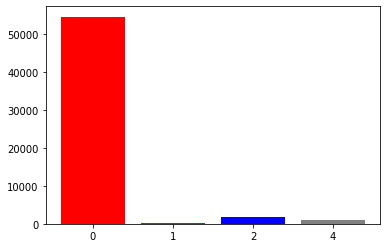

In [10]:
img_id='01281'
flair_data = [[[]]]
t1_data = [[[]]]
t1ce_data = [[[]]]
t2_data = [[[]]]
seg_data = [[[]]]

for i, nil in enumerate([f'./data_process/dataset/BraTS2021/data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' \
                        for s_type in ['flair','t1','t1ce','t2','seg']]):
    image=nib.load(nil).get_fdata()
    title=nil.rsplit("_",1)[1].split(".",1)[0]
    if title == 'flair':
        flair_data=image
    elif title == 't1_data':
        t1_data=image
    elif title == 't1ce':
        t1ce_data=image
    elif title == 't2':
        t2_data=image
    elif title == 'seg':
        seg_data=image
    print(f'============{title}.shape============')
    print(image.shape)

print(f'============seg[:,:,80] analyze============')
seg=seg_data[:,:,80]
seg_array=seg.flatten()
x = np.arange(4)
values=[int(num) for num in np.unique(seg_array,return_counts=True)[1]]
titles=[int(num) for num in np.unique(seg_array)]
plt.bar(x,values,color=['r','g','b','gray'])
plt.xticks(x, titles)
print(np.unique(seg_array,return_counts=True))

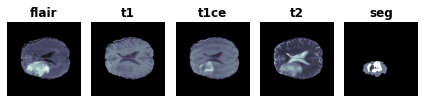

In [11]:
img_id='01281'

for i, nil in enumerate([f'./data_process/dataset/BraTS2021/data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' \
                        for s_type in ['flair','t1','t1ce','t2','seg']]):
    plt.subplot(1,5,i+1)
    image=nib.load(nil).get_fdata()
    title=nil.rsplit("_",1)[1].split(".",1)[0]
    plt.title(title,fontweight='bold')
    plt.axis(False)
    plt.imshow(image[:,:,80],cmap='bone')
plt.tight_layout()
plt.show()

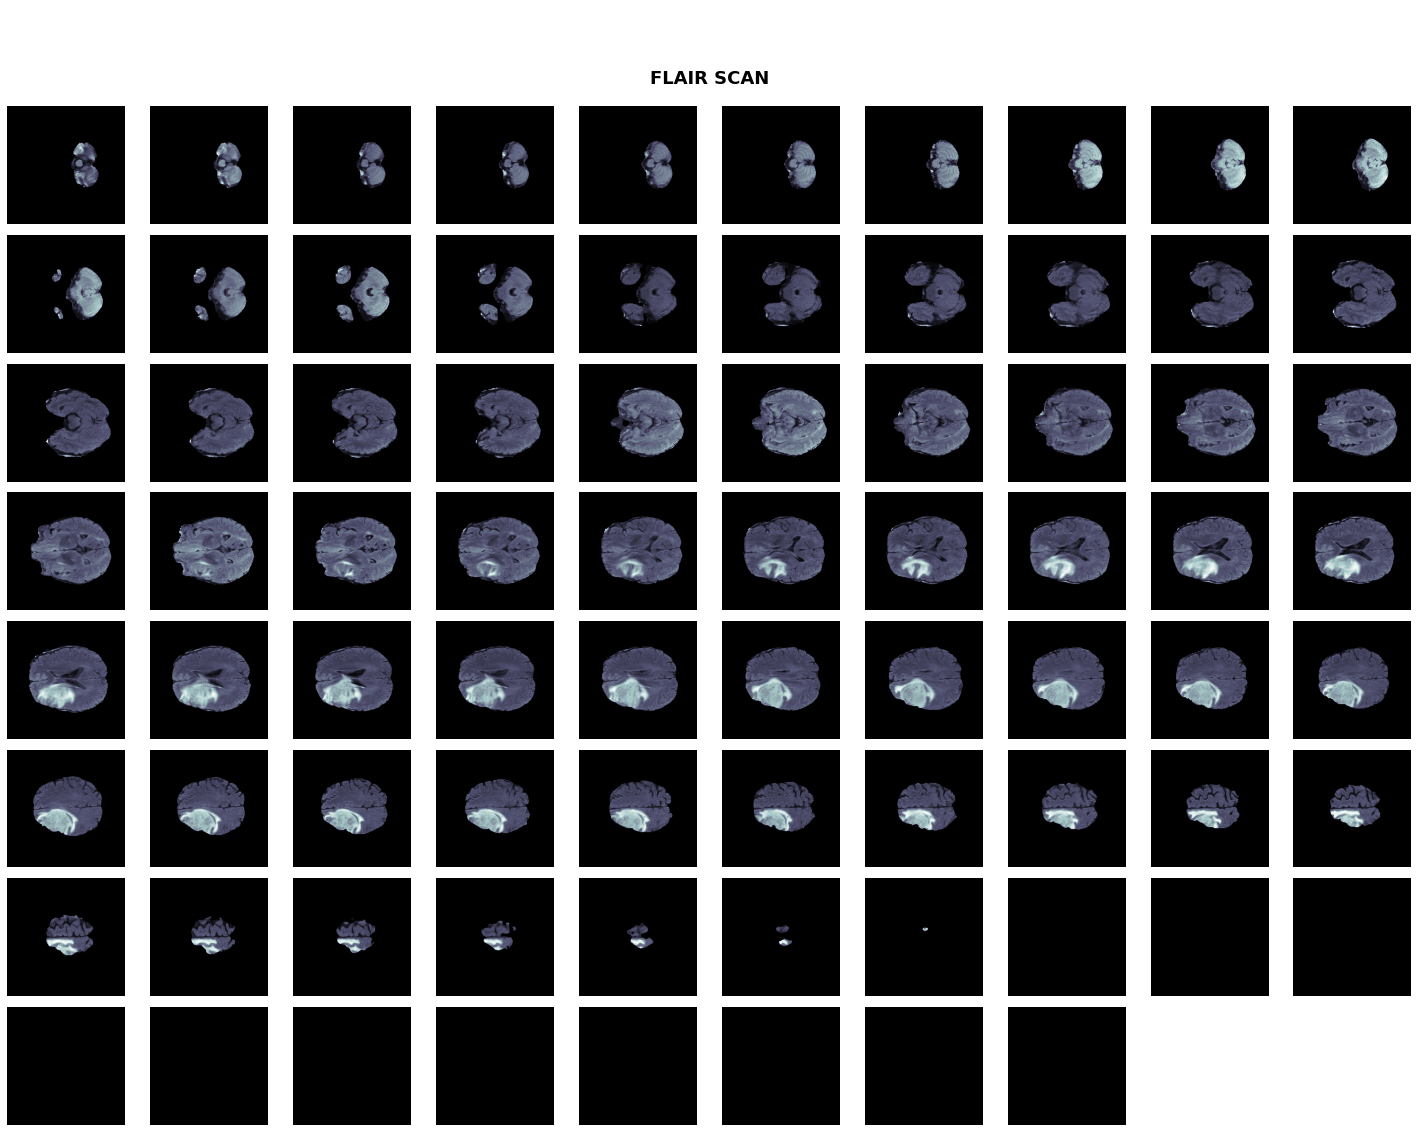

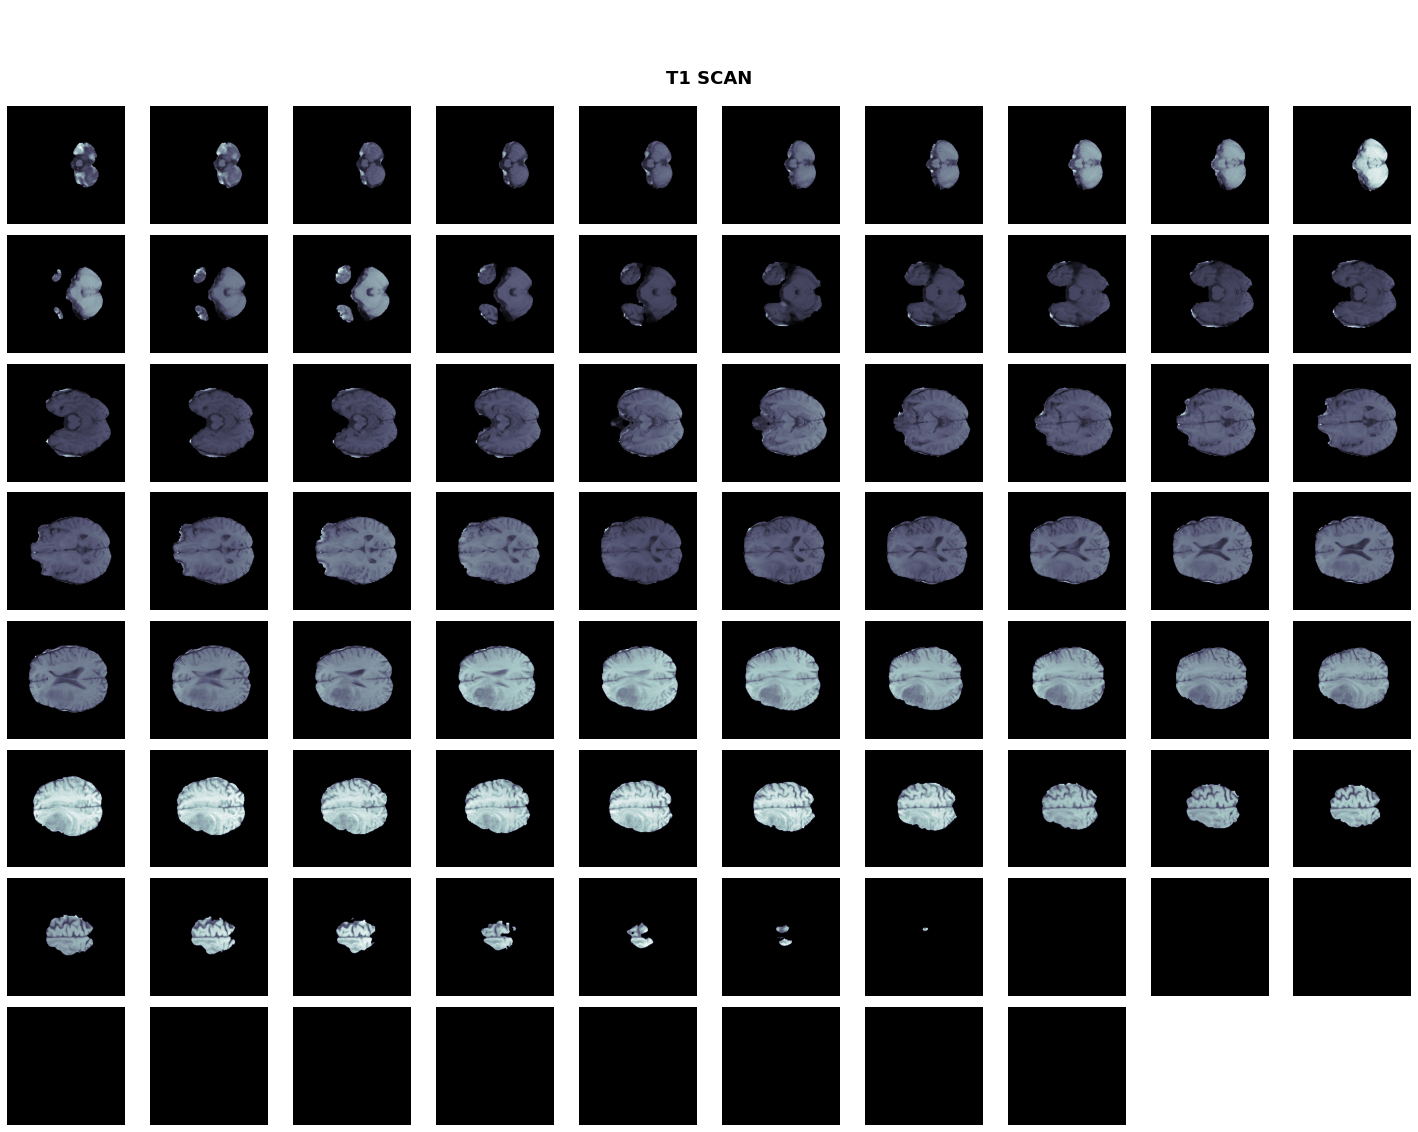

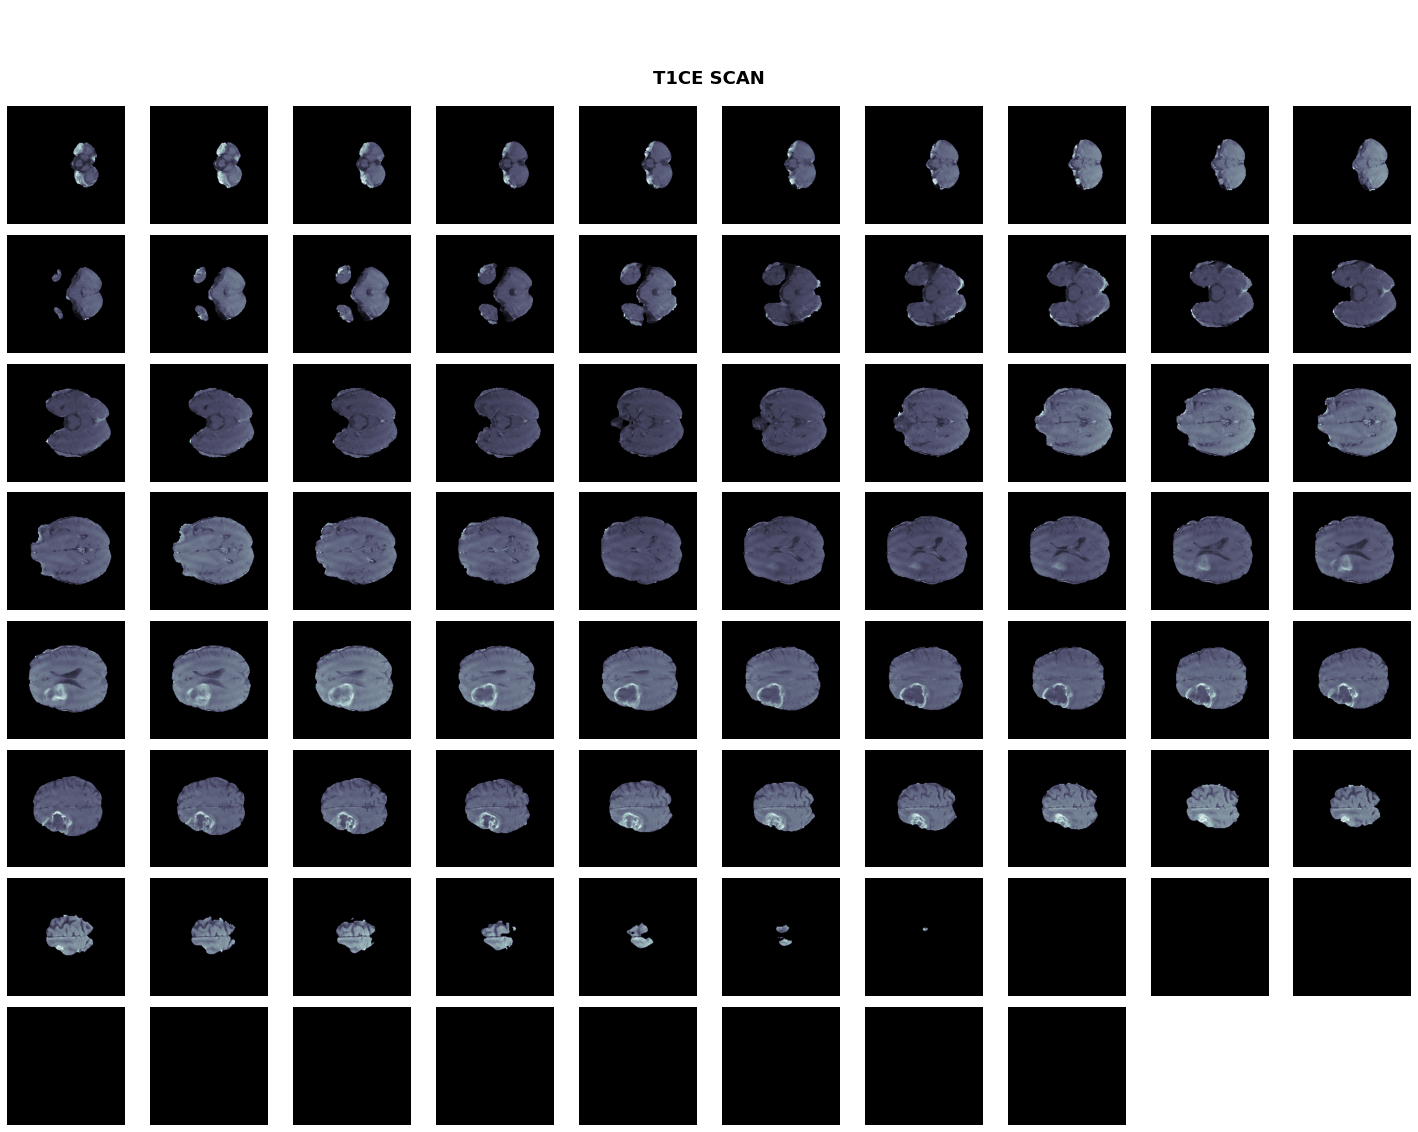

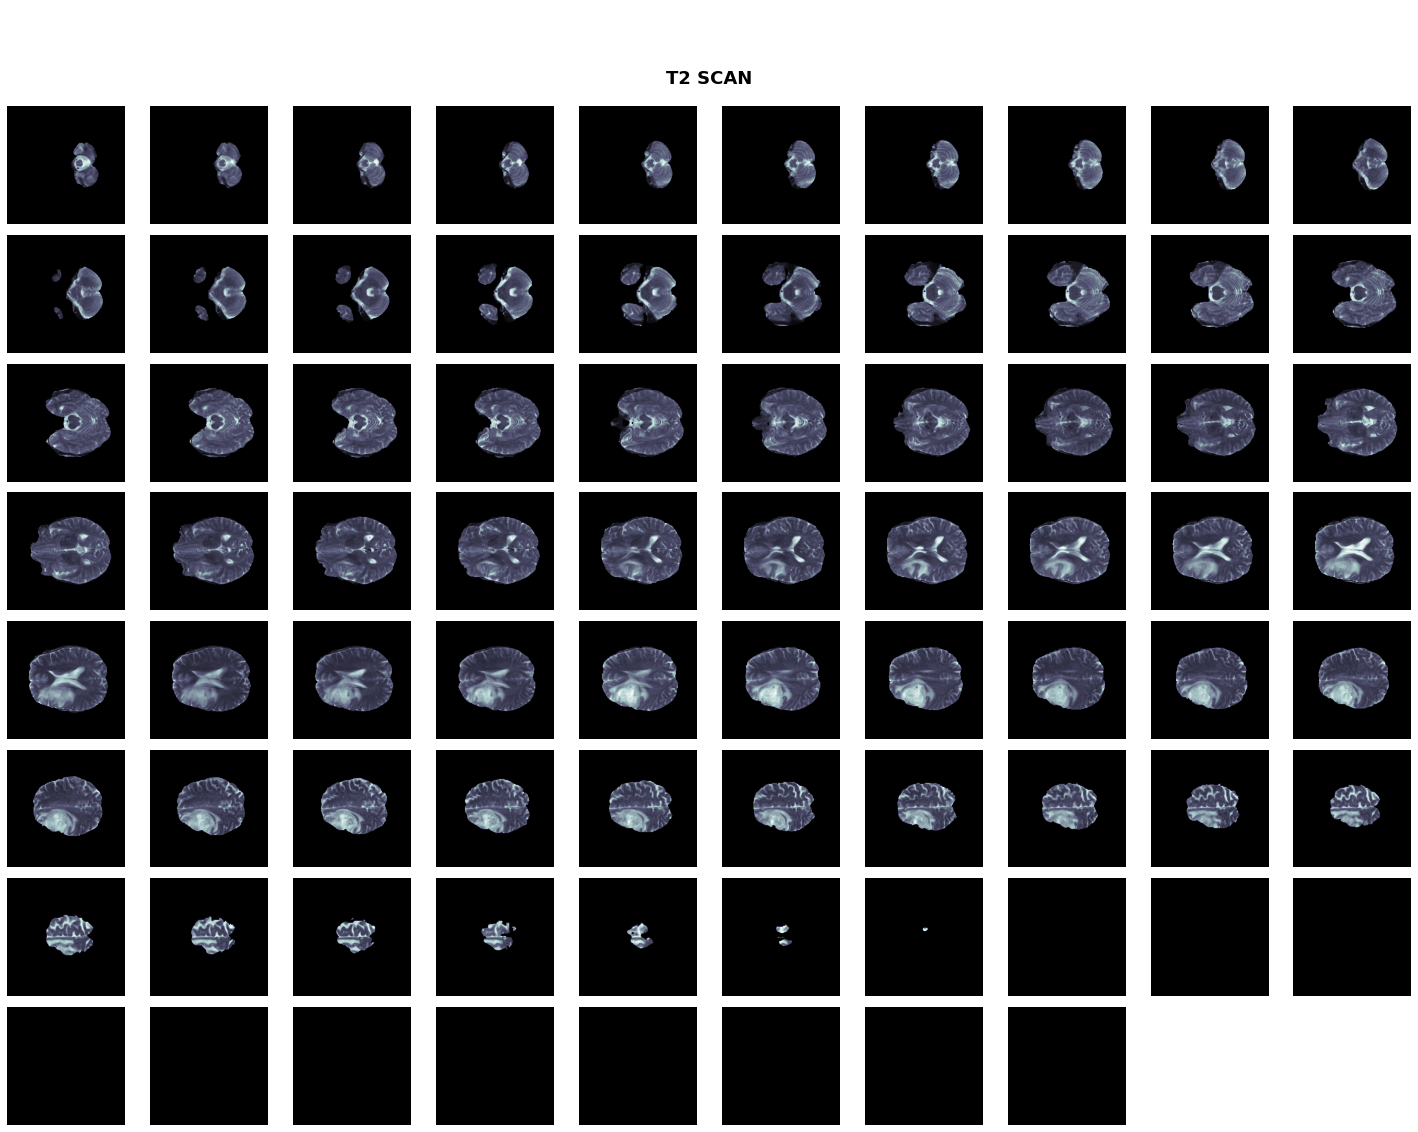

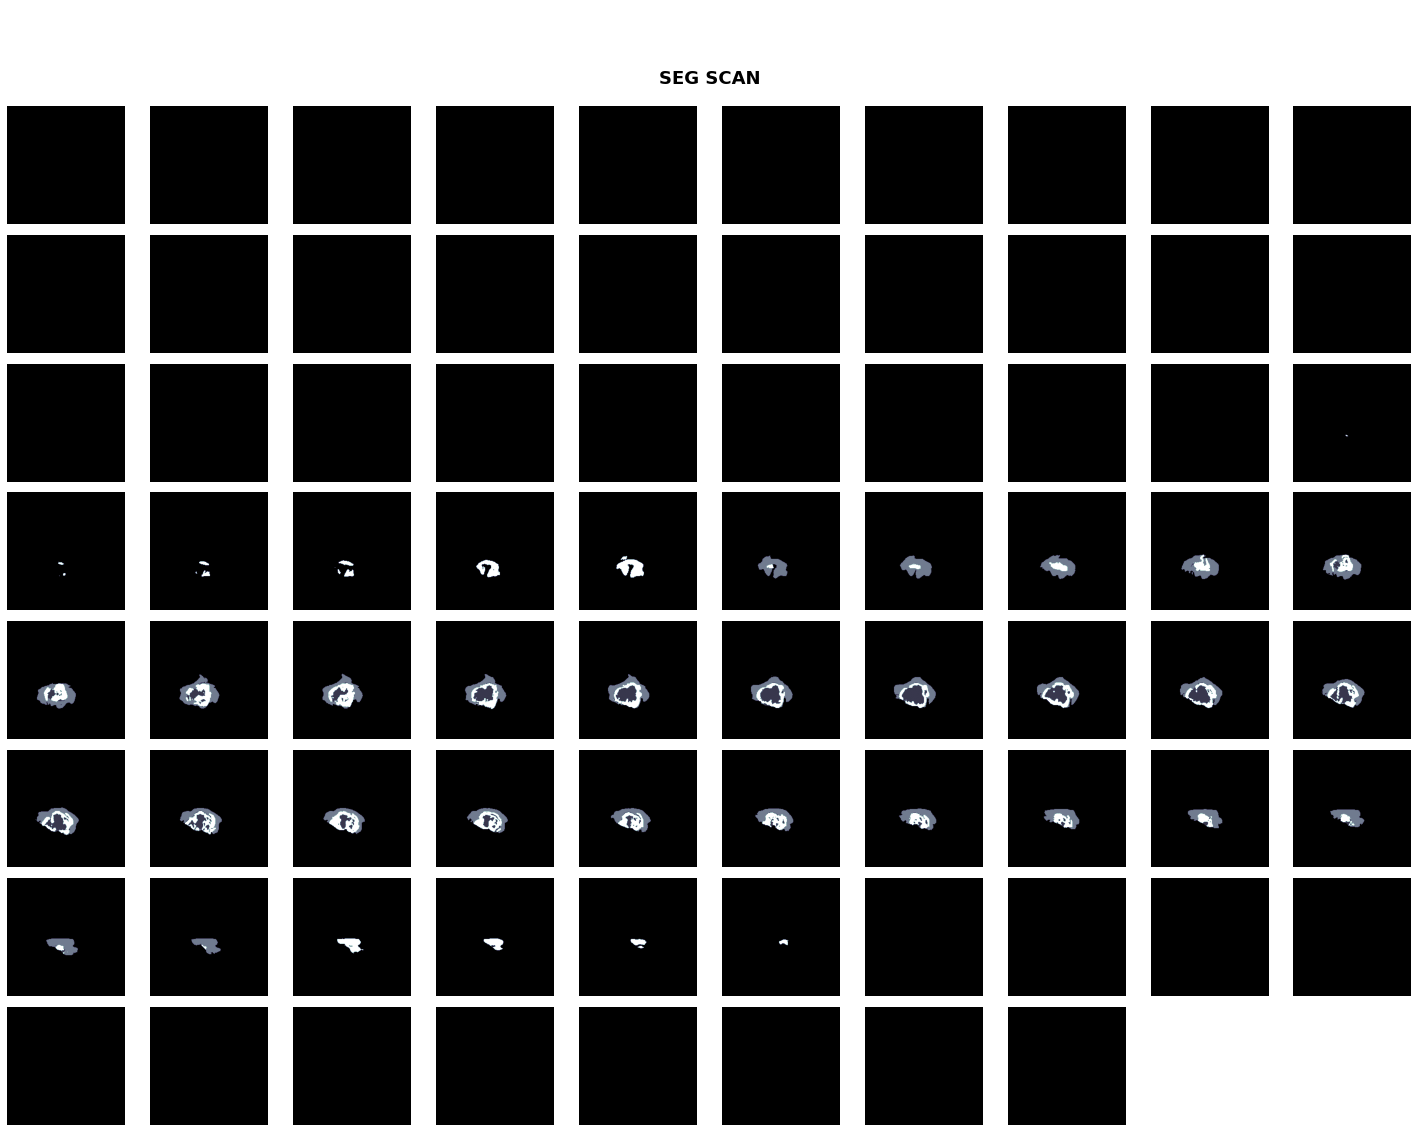

In [12]:
for i, nil in enumerate([f'./data_process/dataset/BraTS2021/data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' \
                        for s_type in ['flair','t1','t1ce','t2','seg']]):    # PLOTTING
    image = nib.load(nil).get_fdata()
    slices = image.shape[-1]
    rows = int(np.ceil((slices/2)/10))
    plt.figure(figsize=(20, rows*2))
    plt.suptitle(f"\n\n\n{nil.rsplit('_', 1)[-1].split('.', 1)[0]} SCAN\n".upper(), fontsize=18, fontweight="bold")
    for j in range(0, slices, 2):
        plt.subplot(rows, 10, 1+j//2)
        plt.axis(False)
        plt.imshow(image[:, :, j], cmap="bone")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


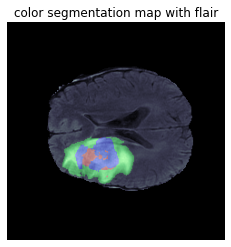

In [13]:
flair=flair_data[:,:,80]
seg=seg_data[:,:,80]

color_segmentation=np.zeros((240,240,3))
gray_segmentation=seg

color_segmentation[gray_segmentation == 1] = [255,0,0] # Red (Necrotic Tumor Core, NCR)
color_segmentation[gray_segmentation == 2] = [0,255,0] # Green (Edema, ED)
color_segmentation[gray_segmentation == 4] = [0,0,255] # Blue (Enhancing Tumor, ET)

plt.title('color segmentation map with flair')
plt.axis('off')
plt.imshow(flair,cmap='bone')
plt.imshow(color_segmentation,alpha=0.3,cmap='bone')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 239.5, 239.5, -0.5)

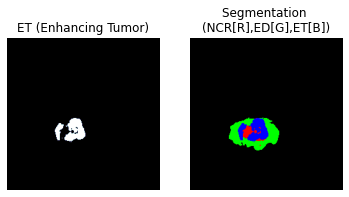

In [14]:
smap=np.zeros((240,240,3))
et=smap[:,:,0]
et_filter=np.where(gray_segmentation == 4)
et[gray_segmentation == 4] = 1

plt.subplot(1,2,1)
plt.title('ET (Enhancing Tumor)')
plt.imshow(et,cmap='bone')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation \n(NCR[R],ED[G],ET[B])')
plt.imshow(color_segmentation,cmap='bone')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 239.5, 239.5, -0.5)

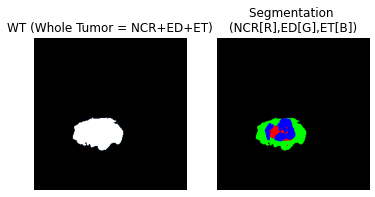

In [15]:
wt=smap[:,:,1]
wt_filter=np.where((gray_segmentation == 1) | (gray_segmentation == 4) | (gray_segmentation == 2))
wt[wt_filter] = 1

plt.subplot(1,2,1)
plt.title('WT (Whole Tumor = NCR+ED+ET)')
plt.imshow(wt,cmap='bone')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation \n(NCR[R],ED[G],ET[B])')
plt.imshow(color_segmentation,cmap='bone')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 239.5, 239.5, -0.5)

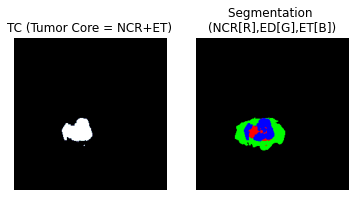

In [16]:
tc=smap[:,:,2]
tc_filter=np.where((gray_segmentation == 1) | (gray_segmentation == 4))
tc[tc_filter] = 1

plt.subplot(1,2,1)
plt.title('TC (Tumor Core = NCR+ET)')
plt.imshow(tc,cmap='bone')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation \n(NCR[R],ED[G],ET[B])')
plt.imshow(color_segmentation,cmap='bone')
plt.axis('off')

(-0.5, 239.5, 239.5, -0.5)

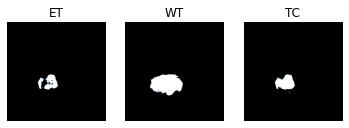

In [17]:
plt.subplot(1,3,1)
plt.title('ET')
plt.imshow(smap[:,:,0],cmap='bone')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('WT')
plt.imshow(smap[:,:,1],cmap='bone')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('TC')
plt.imshow(smap[:,:,2],cmap='bone')
plt.axis('off')

In [26]:
max = -1

for t in range(0, 155):
    
    flair_image = flair_data[:, :, t]
    print(flair_image.max())
    if max < flair_image.max(): max = flair_image.max()
    print(flair_image.min())
    
print(max)

360.0
0.0
315.0
0.0
315.0
0.0
383.0
0.0
403.0
0.0
421.0
0.0
426.0
0.0
403.0
0.0
381.0
0.0
358.0
0.0
336.0
0.0
327.0
0.0
320.0
0.0
282.0
0.0
250.0
0.0
255.0
0.0
245.0
0.0
251.0
0.0
250.0
0.0
261.0
0.0
288.0
0.0
392.0
0.0
363.0
0.0
335.0
0.0
338.0
0.0
426.0
0.0
428.0
0.0
571.0
0.0
571.0
0.0
563.0
0.0
551.0
0.0
547.0
0.0
538.0
0.0
538.0
0.0
530.0
0.0
577.0
0.0
556.0
0.0
539.0
0.0
526.0
0.0
538.0
0.0
529.0
0.0
523.0
0.0
524.0
0.0
524.0
0.0
524.0
0.0
523.0
0.0
518.0
0.0
458.0
0.0
399.0
0.0
374.0
0.0
383.0
0.0
423.0
0.0
468.0
0.0
538.0
0.0
486.0
0.0
469.0
0.0
474.0
0.0
481.0
0.0
487.0
0.0
494.0
0.0
488.0
0.0
483.0
0.0
424.0
0.0
436.0
0.0
463.0
0.0
490.0
0.0
497.0
0.0
544.0
0.0
533.0
0.0
551.0
0.0
570.0
0.0
588.0
0.0
576.0
0.0
555.0
0.0
535.0
0.0
532.0
0.0
538.0
0.0
544.0
0.0
552.0
0.0
552.0
0.0
553.0
0.0
553.0
0.0
558.0
0.0
572.0
0.0
581.0
0.0
609.0
0.0
605.0
0.0
580.0
0.0
578.0
0.0
581.0
0.0
591.0
0.0
601.0
0.0
608.0
0.0
600.0
0.0
597.0
0.0
602.0
0.0
608.0
0.0
614.0
0.0
620.0
0.0
617.0
0.0
